In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import vector

import matplotlib as mpl
mpl.rcParams.update({'font.size': 16})
# mpl.rcParams['text.usetex'] = True
# mpl.rcParams['text.latex.preview'] = True

In [7]:
fdir = "./csvs/"
label = "HiForestMiniAOD_HighPU_1000events"
fname = label + ".csv"
csvf = fdir + fname

tracks = pd.read_csv(csvf)
tracks

,entry,id,trkJetId,trkPt,trkEta,trkPhi,matchIdNoCuts,matchIdMedCuts,matchPtNoCuts,matchPtMedCuts,matchEtaNoCuts,matchEtaMedCuts,matchPhiNoCuts,matchPhiMedCuts,matchStaNoCuts,matchStaMedCuts
0,0,0,0,4.003906,0.440199,2.019888,13,13,3.978516,3.978516,0.439720,0.439720,2.019102,2.019102,200,200
1,0,1,0,1.183594,0.422620,1.949563,15,15,1.180664,1.180664,0.422449,0.422449,1.950442,1.950442,200,200
2,0,2,0,10.140625,0.401196,1.896932,11,11,10.343750,10.343750,0.401414,0.401414,1.896151,1.896151,200,200
3,0,3,0,6.910156,0.329234,2.006798,16,16,6.933594,6.933594,0.329298,0.329298,2.006603,2.006603,200,200
4,0,4,0,1.548828,0.054384,1.980132,106,106,1.538086,1.538086,0.055159,0.055159,1.981207,1.981207,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30053,999,36,15,2.636719,-0.228340,1.713240,112,112,2.585938,2.585938,-0.228852,-0.228852,1.712451,1.712451,1,1
30054,999,37,15,2.341797,-0.274300,1.440177,199,199,2.343750,2.343750,-0.274407,-0.274407,1.440079,1.440079,1,1
30055,999,38,15,1.155273,-0.367138,1.855224,198,198,1.156250,1.156250,-0.366369,-0.366369,1.854833,1.854833,1,1
30056,999,39,19,1.144531,-1.275185,2.114997,233,233,1.145508,1.145508,-1.277636,-1.277636,2.111677,2.111677,1,1


0.7107924678954022


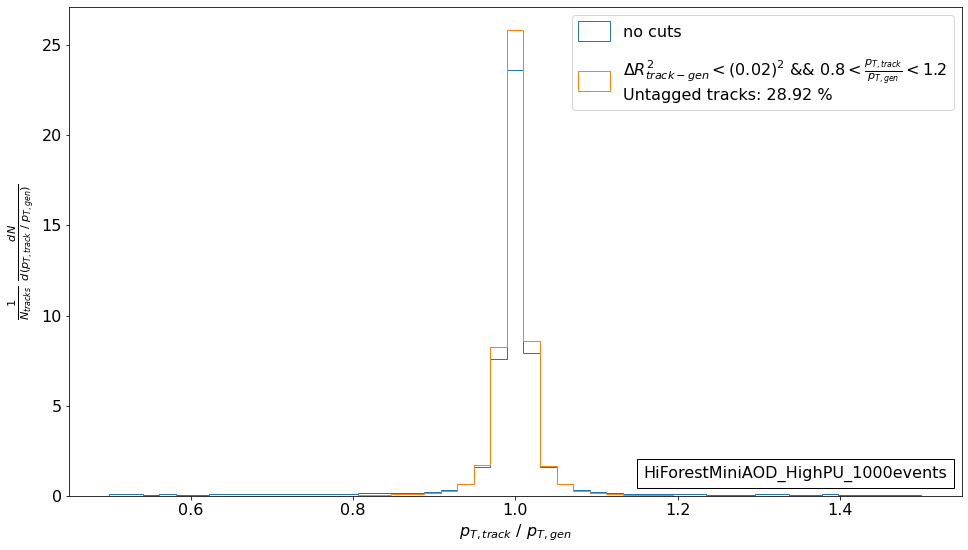

In [17]:
sel_medCuts = tracks["matchIdMedCuts"] > -1

nb_tracks = len(tracks)
nb_true_medCuts = len(tracks[sel_medCuts])

tracks_matched_medCuts_ratio = (nb_true_medCuts / nb_tracks) 
untagged_tracks_perc = np.around((1 - tracks_matched_medCuts_ratio) * 100, 2)
print(tracks_matched_medCuts_ratio)

dpts_noCuts = tracks["trkPt"] / tracks["matchPtNoCuts"]
# dpts_medCuts = tracks.loc[sel_medCuts, "trkPt"] / tracks.loc[sel_medCuts, "matchPtMedCuts"]
dpts_medCuts = tracks["trkPt"] / tracks["matchPtMedCuts"]

fig, ax = plt.subplots(figsize=(16, 9))
binning = np.linspace(0.5, 1.5, 50)

ax.hist(dpts_noCuts, bins=binning, histtype="step", density=True, \
        label=r"no cuts")

ax.hist(dpts_medCuts, bins=binning, histtype="step", density=True, \
        label=r"$\Delta R^{2}_{track-gen} < (0.02)^2$ && $0.8 < \frac{p_{T, track}}{p_{T, gen}} < 1.2$" \
             + "\n" 
             + f"Untagged tracks: {untagged_tracks_perc} %")

legend = ax.legend(labelspacing=1., handleheight=1.5)
# legend.texts[1].set_position((0, -3.))
# print(legend.texts)

txt = mpl.offsetbox.AnchoredText(label, loc='lower right')
ax.add_artist(txt)

ax.set_xlabel(r"$p_{T, track}\ /\ p_{T, gen}$")
ax.set_ylabel(r"$\frac{1}{N_{tracks}}\ \frac{dN}{d(p_{T, track}\ /\ p_{T, gen})}$")

fig.savefig("./plots/" + label + "_relpt.png")
fig.show()

In [9]:
tracks["dr2_noCuts"] = tracks.apply(lambda row: (vector.obj(pt=row.trkPt, phi=row.trkPhi, eta=row.trkEta).deltaR(vector.obj(pt=row.matchPtNoCuts, phi=row.matchPhiNoCuts, eta=row.matchEtaNoCuts)))**2, axis=1)
tracks["dr2_medCuts"] = tracks.apply(lambda row: (vector.obj(pt=row.trkPt, phi=row.trkPhi, eta=row.trkEta).deltaR(vector.obj(pt=row.matchPtMedCuts, phi=row.matchPhiMedCuts, eta=row.matchEtaMedCuts)))**2, axis=1)

tracks

,entry,id,trkJetId,trkPt,trkEta,trkPhi,matchIdNoCuts,matchIdMedCuts,matchPtNoCuts,matchPtMedCuts,matchEtaNoCuts,matchEtaMedCuts,matchPhiNoCuts,matchPhiMedCuts,matchStaNoCuts,matchStaMedCuts,dr2_noCuts,dr2_medCuts
0,0,0,0,4.003906,0.440199,2.019888,13,13,3.978516,3.978516,0.439720,0.439720,2.019102,2.019102,200,200,8.472529e-07,8.472529e-07
1,0,1,0,1.183594,0.422620,1.949563,15,15,1.180664,1.180664,0.422449,0.422449,1.950442,1.950442,200,200,8.018088e-07,8.018088e-07
2,0,2,0,10.140625,0.401196,1.896932,11,11,10.343750,10.343750,0.401414,0.401414,1.896151,1.896151,200,200,6.580383e-07,6.580383e-07
3,0,3,0,6.910156,0.329234,2.006798,16,16,6.933594,6.933594,0.329298,0.329298,2.006603,2.006603,200,200,4.237000e-08,4.237000e-08
4,0,4,0,1.548828,0.054384,1.980132,106,106,1.538086,1.538086,0.055159,0.055159,1.981207,1.981207,1,1,1.754306e-06,1.754306e-06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30053,999,36,15,2.636719,-0.228340,1.713240,112,112,2.585938,2.585938,-0.228852,-0.228852,1.712451,1.712451,1,1,8.852054e-07,8.852054e-07
30054,999,37,15,2.341797,-0.274300,1.440177,199,199,2.343750,2.343750,-0.274407,-0.274407,1.440079,1.440079,1,1,2.099401e-08,2.099401e-08
30055,999,38,15,1.155273,-0.367138,1.855224,198,198,1.156250,1.156250,-0.366369,-0.366369,1.854833,1.854833,1,1,7.427946e-07,7.427946e-07
30056,999,39,19,1.144531,-1.275185,2.114997,233,233,1.145508,1.145508,-1.277636,-1.277636,2.111677,2.111677,1,1,1.703111e-05,1.703111e-05


0.7107924678954022


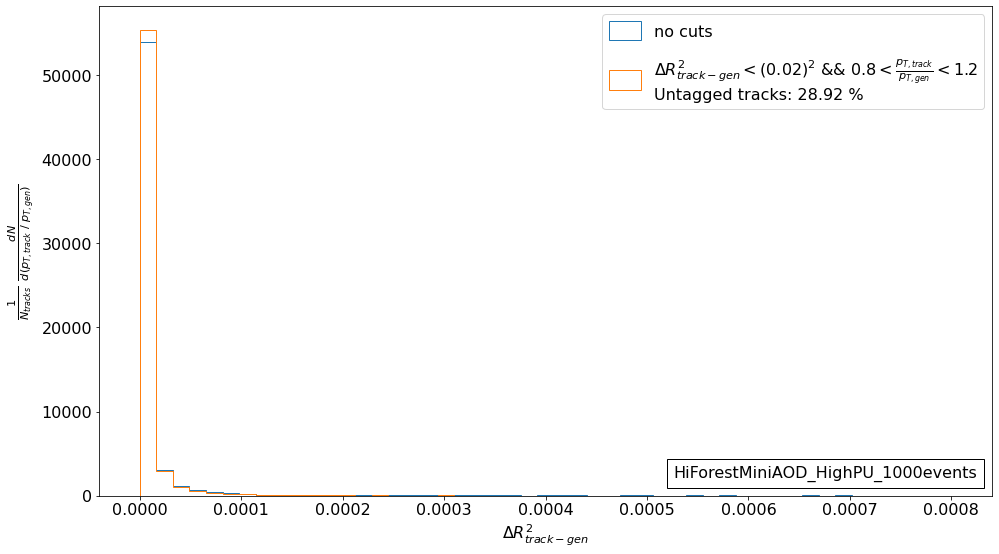

In [16]:
sel_medCuts = tracks["matchIdMedCuts"] > -1

nb_tracks = len(tracks)
nb_true_medCuts = len(tracks[sel_medCuts])

tracks_matched_medCuts_ratio = (nb_true_medCuts / nb_tracks) 
untagged_tracks_perc = np.around((1 - tracks_matched_medCuts_ratio) * 100, 2)
print(tracks_matched_medCuts_ratio)

dr2s_noCuts = tracks["dr2_noCuts"]
dr2s_medCuts = tracks.loc[sel_medCuts, "dr2_medCuts"]

fig, ax = plt.subplots(figsize=(16, 9))
binning = np.linspace(0., 0.0008, 50)

ax.hist(dr2s_noCuts, bins=binning, histtype="step", density=True, \
        label=r"no cuts")

ax.hist(dr2s_medCuts, bins=binning, histtype="step", density=True, \
        label=r"$\Delta R^{2}_{track-gen} < (0.02)^2$ && $0.8 < \frac{p_{T, track}}{p_{T, gen}} < 1.2$" \
             + "\n" 
             + f"Untagged tracks: {untagged_tracks_perc} %")

legend = ax.legend(labelspacing=1., handleheight=1.5)
# legend.texts[1].set_position((0, -3.))
# print(legend.texts)

txt = mpl.offsetbox.AnchoredText(label, loc='lower right')
ax.add_artist(txt)

ax.set_xlabel(r"$\Delta R^2_{track-gen}$")
ax.set_ylabel(r"$\frac{1}{N_{tracks}}\ \frac{dN}{d(p_{T, track}\ /\ p_{T, gen})}$")

fig.savefig("./plots/" + label + "_dr2.png")
fig.show()